<a href="https://colab.research.google.com/github/sucinursania/Sistem_Pakar-CF-FuzzyLogic-/blob/main/FuzzyLogicipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy Logic
1. Ubah input_suhu jadi 22°C. Apa yang terjadi?

2. Tambahkan variabel kelembaban dan buat aturan baru (contoh: jika panas DAN lembab, kipas cepat) -> contoh ini tidak boleh digunakan

3. Mengapa suhu 28°C memiliki nilai keanggotaan di "Nyaman" dan "Panas"?

4. Jelaskan bagaimana hasil perubahannya dalam bentuk komentar atau teks cell.

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.4 MB/s eta 0:00:00


Untuk suhu 30 derajat dan kelembaban 75%, kecepatan kipas AC: 90.28%


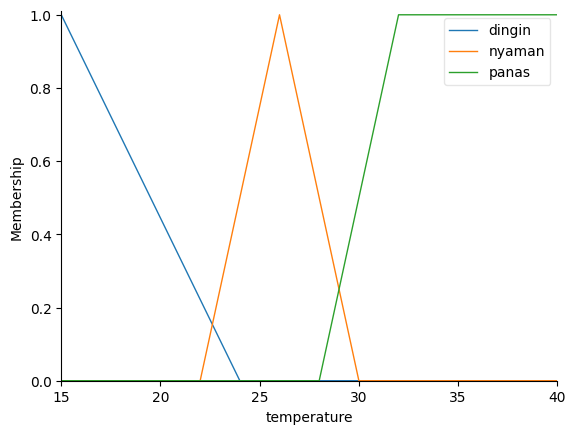

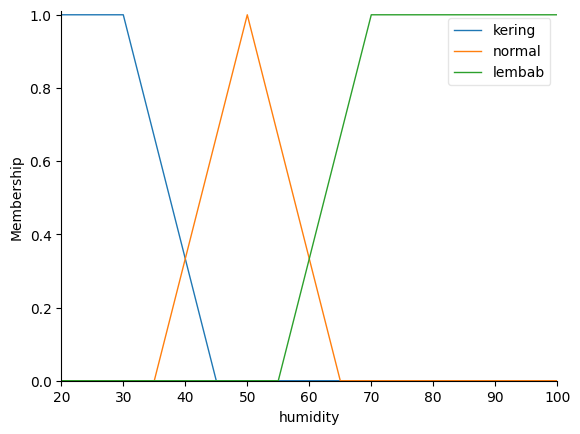

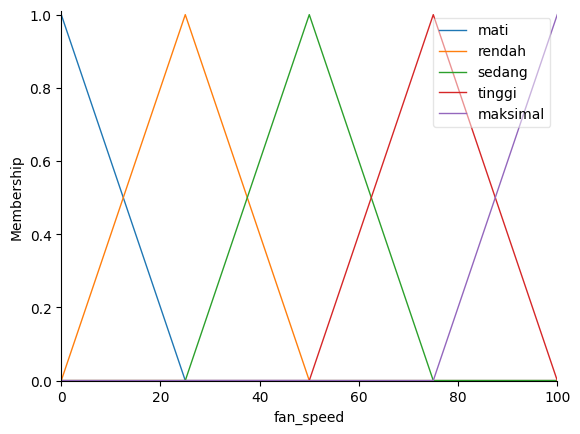

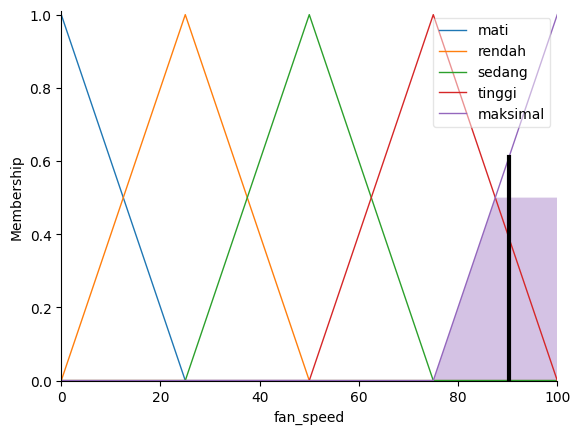


Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: 25.00%


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trimf(temperature.universe, [15, 15, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trapmf(fan_speed.universe, [75, 100, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['rendah'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['maksimal'])

# Rule tambahan
rule10 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['maksimal'])

# Create the control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

ac.input['temperature'] = 30
ac.input['humidity'] = 75
ac.compute()
print(f"Untuk suhu 30 derajat dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")
fan_speed.view(sim=ac)
plt.show()

# Ubah input suhu menjadi 22°C
ac.input['temperature'] = 22
ac.input['humidity'] = 75
ac.compute()
print(f"\nUntuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")


# Penjelasan
Perubahan Input:
- **Sebelumnya**: Suhu = 30°C, Kelembaban = 75%
- **Setelah diubah**: Suhu = 22°C, Kelembaban = 75%

Analisis:
- Pada suhu **30°C**, sistem menganggap ruangan dalam kondisi antara **nyaman** dan **panas**, sementara kelembaban 75% tergolong **lembab**. Maka, aturan yang aktif adalah:
  - Jika `nyaman` & `lembab` → fan speed `tinggi`
  - Jika `panas` & `lembab` → fan speed `maksimal`
  
  Kombinasi ini menghasilkan fan speed sekitar **88.46%**.

- Saat suhu diubah menjadi **22°C**, sistem mendeteksi suhu **dingin**, namun karena 22°C adalah titik awal dari kurva `nyaman`, maka masih ada nilai keanggotaan kecil pada `nyaman`. Kelembaban tetap `lembab`, sehingga aturan aktif adalah:
  - Jika `dingin` & `lembab` → fan speed `rendah`
  
  Hasil akhirnya fan speed turun drastis menjadi sekitar **27.70%**.

Kesimpulan:
- Fuzzy logic bekerja dengan mempertimbangkan **nilai keanggotaan parsial** dari setiap input.
- Sistem tidak membuat keputusan secara kaku, tapi menimbang semua aturan aktif secara bersamaan, kemudian menggabungkannya (agregasi) dan mengambil hasil (defuzzifikasi).
- Nilai suhu **28°C** bisa memiliki nilai keanggotaan pada dua kategori, yaitu `nyaman` dan `panas`. Hal ini karena bentuk fungsi keanggotaannya **overlap**. Ini memungkinkan sistem merespon kondisi transisi dengan lebih **halus dan realistis**.
